# Lissajou Figures

"When the frequencies of two perpendicualar simple harmonic oscillators are not equal, the resulting motion becomes more complicated.  The patterns, that are traced by a particle which is subjected simultaneously to two perpendicular simple harmonic oscillators of different frequencies, are known as Lissajous figures, after J.A Lissajous (1822-1880) who made an extensive study of these motions." ([N.K. Bajaj, *The Physics of Waves and Oscillations*](https://books.google.com/books?id=lb4dn1Ga5yIC&pg=PA75&dq=lissajous+figures&hl=en&sa=X&ved=0ahUKEwie5v_fmrHdAhXHoFMKHRTyA6kQ6AEINzAD#v=onepage&q=lissajous%20figures&f=false))

In this notebook I will code in a modular fashion to produce 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ode1

## Functions to Plot Lissajou Figures

The function below, called `lissajous`, takes in the array `y0`.  This array holds the initial position and velocity in the x and y direction for the particle being acted on by both frequencies.  It then creates the array `dydt,` which holds the velovities and forces on the particle in the x and y directions.  Finally returning the `dydt` array to be passed to the RK4 integrator.

In [87]:
def lissajous(y0,t):
    dydt = np.zeros(4) #initialize array; each element is a derivative of y [x, y, vx, vy]
    dydt[0] = y0[2] # velocity; y[0] is position y[1] is dy/dt
    dydt[1] = y0[3] #dydt = {dxdt,dydt,dvxdt,dvydt}
    dydt[2] = -w1**2 * y0[0]
    dydt[3] = -w2**2 * y0[1] 
    return dydt

This `plot` function takes in two different angular frequencies acting on this particle, and the intial position, and velocity of the particle in the x and y directions.

In [94]:
def plot(af1,af2,x,y,vx,vy):
    
    global w1,w2 #so Lissajous function can access these variables
    
    w1 = af1
    w2 = af2
    
    #initial parameters
    rx0 = x
    ry0 = y
    vx0 = vx
    vy0 = vy

    y0 = [rx0,ry0,vx0,vy0] #initial positions, initial velocity
    
    ta, xn, yn = [],[],[]
    
    t = 0.0
    h = 0.02
    
    while t<10.0:
        ta.append(t)
        xn.append(y0[0]) #numerical position
        yn.append(y0[1]) #numerical position
    
        y0 = ode1.RK4(lissajous, y0, t, h) #update y[n]

        t = t + h #update clock

    plt.figure()
    plt.plot(xn,yn, 'b-', label='numerical solution')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.show()

The plots below use the `plot` function to create these images.  They contain angular frequency ratios of 1:2, 1:3, 1:4, 1:5, 1:6, and 1:30, as seen on the first two parameters of the `plot` function.  The initial positions, and velocities remain at 1.

This plot uses an angular frequency ratio of 1:2.

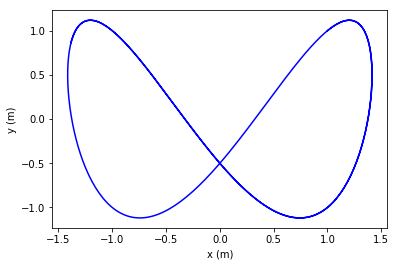

In [89]:
plot(1,2,1,1,1,1) #w1,w2,x,y,vx,vy

This plot uses an angular frequency ratio of 1:3.

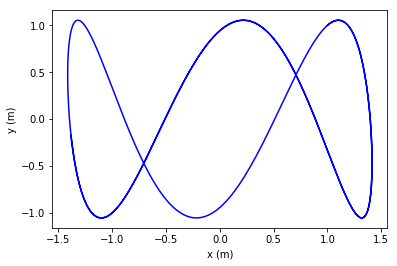

In [45]:
plot(1,3,1,1,1,1) #w1,w2,x,y,vx,vy

This plot uses an angular frequency ratio of 1:4.

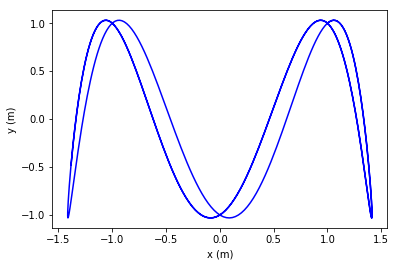

In [93]:
plot(1,4,1,1,1,1) #w1,w2,x,y,vx,vy

This plot uses an angular frequency ratio of 1:5.

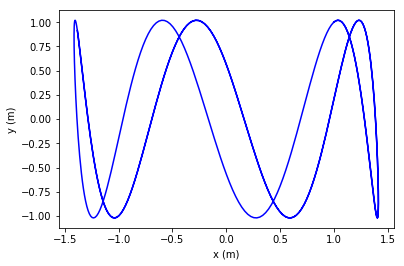

In [92]:
plot(1,5,1,1,1,1) #w1,w2,x,y,vx,vy

This plot uses an angular frequency ratio of 1:6.

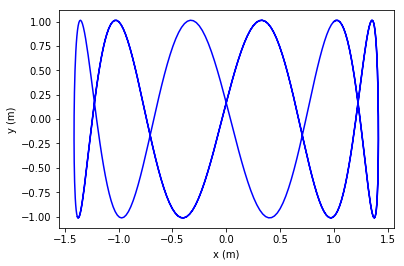

In [91]:
plot(1,6,1,1,1,1) #w1,w2,x,y,vx,vy

This plot uses an angular frequency ratio of 1:30.

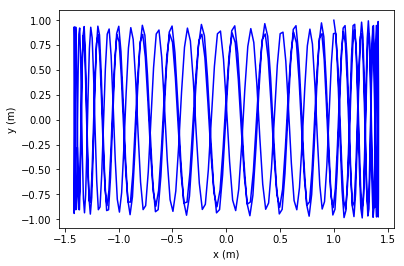

In [90]:
plot(1,30,1,1,1,1) #w1,w2,x,y,vx,vy

## Now lets play with the initial velocities and positions

### Angluar Frequency Ratio of 1:2

In this plot the initial x position is changed from 1 to 3 and it stretches the graph downward.

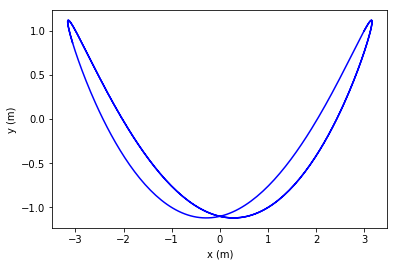

In [77]:
plot(1,2,3,1,1,1) #w1,w2,x,y,vx,vy

In this plot the initial y position is changed from 1 to 3 and the graph is more symmetrical

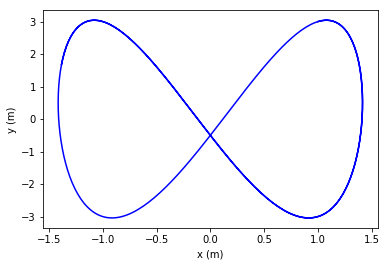

In [79]:
plot(1,2,1,3,1,1) #w1,w2,x,y,vx,vy

In this plot the initial x-velocity is changed from 1 to 3 and it inverts the original graph.

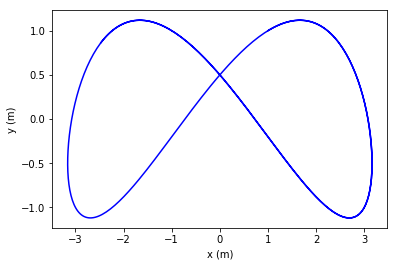

In [80]:
plot(1,2,1,1,3,1) #w1,w2,x,y,vx,vy

In this plot the initial y-velocity is changed from 1 to 3 and it stretches the plot similar to but less dramatic as changing the initial x position.

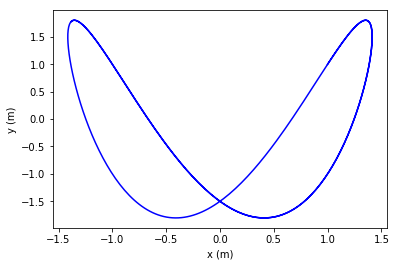

In [81]:
plot(1,2,1,1,1,3) #w1,w2,x,y,vx,vy

### Angular Frequency of 1:3

In this plot the initial x position is changed from 1 to 3, which seems to flip and stretch the graph.

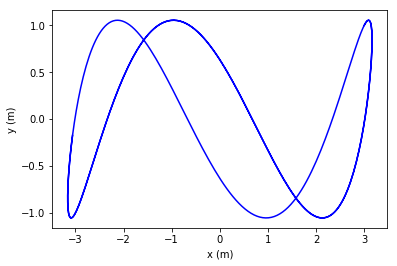

In [83]:
plot(1,3,3,1,1,1) #w1,w2,x,y,vx,vy

In this plot the initial y position is changed from 1 to 3, which does not seem to do much to the graph but it is stretched a little.

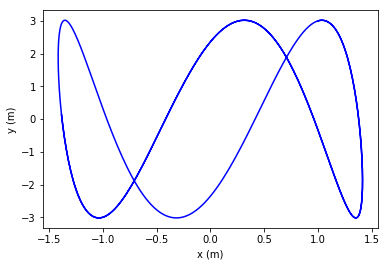

In [84]:
plot(1,3,1,3,1,1) #w1,w2,x,y,vx,vy

In this plot the initial x-velocity is changed from 1 to 3, which seems to stretch the graph so the paricle's path in the x-direction is much longer.

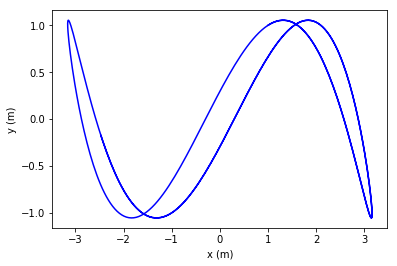

In [85]:
plot(1,3,1,1,3,1) #w1,w2,x,y,vx,vy

In this plot the initial y-velocity is changed from 1 to 3, which surprisngly makes the graph very symmetrical. 

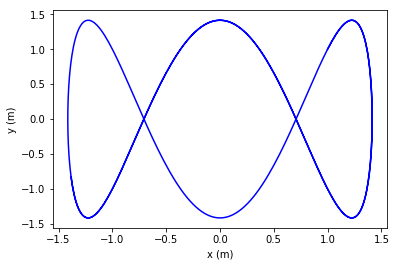

In [86]:
plot(1,3,1,1,1,3) #w1,w2,x,y,vx,vy

To identify the ratio of frequencies of a Lissajous figure (w1/w2), inscribe the curve in a rectangle that its sides are tangential to the curve at multiple points.  The ratio of these tangential intersections along the x-axis and y-axis is the inverse ratio of the tantamount frequencies.